<a href="https://colab.research.google.com/github/jing-pw/YCBS258-Assignments/blob/master/C6_Autoencoder_Stacked_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Autoencoder
### Directives
* Create the autoencoders described below, you can play with the topology, those are just starting points
* Use GPU runtime
* Print 10 inputs and their associated outputs
* Don't forget to normalize your data
* Use the Functional API for Keras

### Autoencoders to build
1. Stacked 784 - 392 - 196 - 392 - 784
2. Convolutional Encoder (conv, maxpool, conv, maxpool, conv, maxpool). Decoder (conv, upsample2d, conv, upsample2d, conv, upsample2d, conv)


In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, _), (X_test, _) = mnist.load_data()
all_data = np.concatenate((X_train, X_test))
all_data.shape

Using TensorFlow backend.


(70000, 28, 28)

In [0]:
def print_first_9(data):
  fig = plt.figure()
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(data[i], interpolation='none')
    plt.title("Digit: {}".format(i))
    plt.xticks([])
    plt.yticks([])

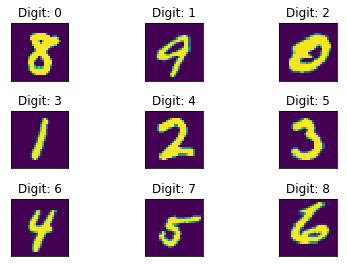

In [3]:
print_first_9(all_data[-9:])

In [0]:
X = all_data.reshape(all_data.shape[0], 784).astype('float32')

In [5]:
X.shape

(70000, 784)

In [0]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model
import keras.backend as K

In [7]:
# Stacked 784 - 392 - 196 - 392 - 784
K.clear_session()

stacked_in = Input(shape=(784,))
stacked = Dense(784, activation='linear')(stacked_in)
stacked = Dense(392, activation='linear')(stacked)
stacked = Dense(196, activation='linear')(stacked)
stacked = Dense(392, activation='linear')(stacked)
stacked_out = Dense(784, activation='linear')(stacked)

stacked_model = Model(stacked_in, stacked_out)
stacked_model.compile(optimizer='adam', loss='mse')

W0623 22:23:42.991222 140143258126208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0623 22:23:42.992981 140143258126208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0623 22:23:43.036529 140143258126208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 22:23:43.046430 140143258126208 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated an

In [8]:
stacked_model.fit(X/255, X/255, epochs=10, batch_size=100)

Epoch 1/10
70000/70000 [==============================] - 6s 88us/sample - loss: 0.0114
Epoch 2/10
70000/70000 [==============================] - 2s 36us/sample - loss: 0.0033
Epoch 3/10
70000/70000 [==============================] - 3s 36us/sample - loss: 0.0028
Epoch 4/10
70000/70000 [==============================] - 2s 35us/sample - loss: 0.0027
Epoch 5/10
70000/70000 [==============================] - 2s 34us/sample - loss: 0.0027
Epoch 6/10
70000/70000 [==============================] - 2s 35us/sample - loss: 0.0028
Epoch 7/10
70000/70000 [==============================] - 2s 35us/sample - loss: 0.0027
Epoch 8/10
70000/70000 [==============================] - 2s 34us/sample - loss: 0.0027
Epoch 9/10
70000/70000 [==============================] - 2s 34us/sample - loss: 0.0028
Epoch 10/10
70000/70000 [==============================] - 2s 35us/sample - loss: 0.0028


In [9]:
stacked_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_3 (Dense)              (None, 392)               77224     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               308112    
Total params: 1,385,524
Trainable params: 1,385,524
Non-trainable params: 0
___________________________________________________

In [0]:
y = stacked_model.predict(X)

In [14]:
y = y.reshape(y.shape[0],28,28)
y.shape

(70000, 28, 28)

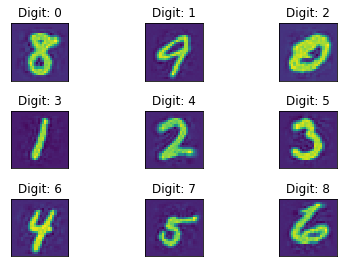

In [15]:
print_first_9(y[-9:])

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [5]:
all_data.dtype

dtype('uint8')

In [0]:
X1 = all_data.reshape(-1, 28, 28, 1).astype('float32')

In [7]:
X1.shape

(70000, 28, 28, 1)

In [8]:
X1.dtype

dtype('float32')

In [0]:
# Convolutional Encoder (conv, maxpool, conv, maxpool, conv, maxpool). 
# Decoder (conv, upsample2d, conv, upsample2d, conv, upsample2d, conv)
from keras.optimizers import RMSprop
K.clear_session()

encoder_in = Input(shape=(28, 28, 1), name='input')

encoder_layer = Conv2D(32, (3, 3), activation='relu',
                       padding='same',
                       name='encoder_1')(encoder_in)
encoder_layer = MaxPooling2D(pool_size=(2, 2),
                             padding='same',
                             name='encoder_2')(encoder_layer)
encoder_layer = Conv2D(16, (3, 3), activation='relu',
                       padding='same',
                       name='encoder_3')(encoder_layer)
encoder_layer = MaxPooling2D(pool_size=(2, 2),
                             padding='same', 
                             name='encoder_4')(encoder_layer)
encoder_layer = Conv2D(8, (3, 3), activation='relu',
                       padding='same', 
                       name='encoder_5')(encoder_layer)
encoder_layer = MaxPooling2D(pool_size=(2, 2),
                             padding='same',
                             name='encoder_6')(encoder_layer)
#compressed = Conv2D(8, (3, 3), activation='relu',
#                    padding='same', 
#                    name='compressed')(encoder_layer)
decoder_layer = Conv2D(8, (3, 3), activation='relu',
                      padding='same',
                      name='decoder_1')(encoder_layer)
decoder_layer = UpSampling2D((2, 2), 
                             name='decoder_2')(decoder_layer)
decoder_layer = Conv2D(16, (3, 3), activation='relu',
                      padding='same',
                      name='decoder_3')(decoder_layer)
decoder_layer = UpSampling2D((2, 2), name='decoder_4')(decoder_layer)
decoder_layer = Conv2D(32, (3, 3), activation='relu',
                      name='decoder_5')(decoder_layer)
decoder_layer = UpSampling2D((2, 2), name='decoder_6')(decoder_layer)

decoder_out = Conv2D(1, (3, 3), activation='sigmoid', 
                     padding='same', name='output')(decoder_layer)

autoencoder = Model(encoder_in, decoder_out)
autoencoder.compile(optimizer='RMSprop',loss='mse')

In [27]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder_1 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
encoder_2 (MaxPooling2D)     (None, 14, 14, 32)        0         
_________________________________________________________________
encoder_3 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
encoder_4 (MaxPooling2D)     (None, 7, 7, 16)          0         
_________________________________________________________________
encoder_5 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
encoder_6 (MaxPooling2D)     (None, 4, 4, 8)           0     

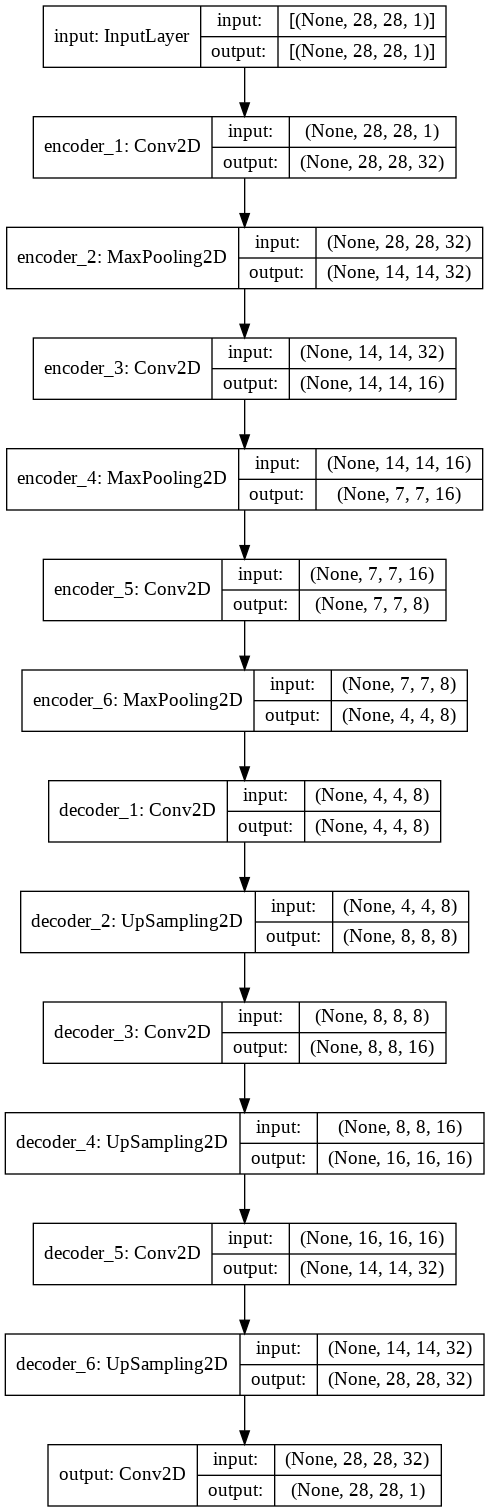

In [28]:
import tensorflow as tf

tf.keras.utils.plot_model(
    autoencoder, 
    to_file='{}.png'.format(autoencoder), 
    show_shapes=True, 
    show_layer_names=True
)

from IPython.display import Image
Image(retina=True, filename='{}.png'.format(autoencoder))

In [34]:
autoencoder.fit(X1/255, X1/255, epochs=100, batch_size=128)

Epoch 1/100
70000/70000 [==============================] - 4s 57us/sample - loss: 0.0425
Epoch 2/100
70000/70000 [==============================] - 4s 51us/sample - loss: 0.0266
Epoch 3/100
70000/70000 [==============================] - 4s 51us/sample - loss: 0.0219
Epoch 4/100
70000/70000 [==============================] - 4s 51us/sample - loss: 0.0194
Epoch 5/100
70000/70000 [==============================] - 4s 52us/sample - loss: 0.0176
Epoch 6/100
70000/70000 [==============================] - 4s 52us/sample - loss: 0.0164
Epoch 7/100
70000/70000 [==============================] - 4s 52us/sample - loss: 0.0154
Epoch 8/100
70000/70000 [==============================] - 4s 51us/sample - loss: 0.0147
Epoch 9/100
70000/70000 [==============================] - 4s 52us/sample - loss: 0.0141
Epoch 10/100
70000/70000 [==============================] - 4s 52us/sample - loss: 0.0136
Epoch 11/100
70000/70000 [==============================] - 4s 51us/sample - loss: 0.0131
Epoch 12/100
70000/

In [38]:
y1 = autoencoder.predict(X1/255.0)
y1.shape

(70000, 28, 28, 1)

In [39]:
y1 = y1.reshape(y1.shape[0],28,28)
y1.shape

(70000, 28, 28)

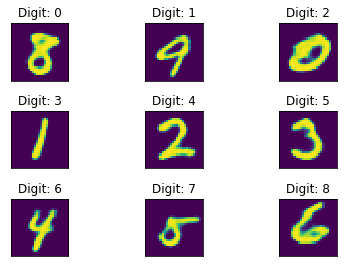

In [40]:
print_first_9(y1[-9:])

I found it's interesting that when predicting, in stack mode, normalize the input or not, results are similar, but in conv autoencoder, results are very different.

Also adding filters in conv encoder would result in much worse performance. Wondering why.